## deforming one image into another

i learned about wasserstein distances for optimal transport, but turns out they're a big deal in image processing. so i'm coding up this small thing to compare different ways of deforming one image into another.

The different methods:
1) WASSERSTEIN GEODESIC - let me deform along the path specified by the optimal coupling
2) local linear deformation - for each pixel, move from source value to target value at constant velocity

the play:

1) prep source image and target image (say 128x128, black and white so i dont have to deal with extra rgb dimensionality)
2) store as matrices
3) deform(source, target, t)
    at t=0, the image should be the source
    we slide t along from 0 to 1 and push the image mass along whichever method
    at t=1, the image should be the target

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

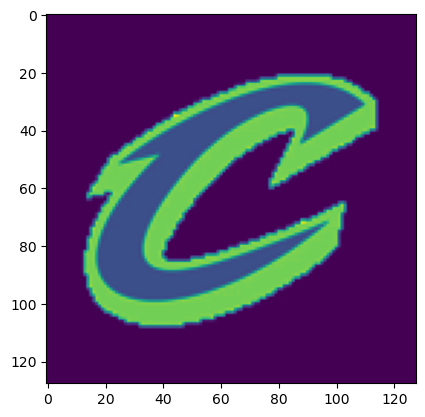

In [ ]:
source = Image.open("cavs.webp").convert('L')
target = Image.open("lakers.webp").convert('L')

# image = Image.open("Images/rose.jpg")
# new_size = (300, 200)
# resized_image = image.resize(new_size)
# resized_image.show()

source = np.asarray(source.resize((128, 128)))
target = np.asarray(target.resize((128, 128)))

plt.imshow(source)
plt.show()

def deform(source, target, t):
    image = np.add(np.multiply(1-t, source), np.multiply(t, target))
    return image

from matplotlib.widgets import Slider

plt.imshow(deform(source, target, 0))
axb = plt.axes([0.15, 0, 0.65, 0.03])
sb = Slider(ax=axb, label="t", valmin=0, valmax=1, valinit=0)

def update(val):
    plt.imshow(deform(source, target, val))
sb.on_changed(update)

plt.show()

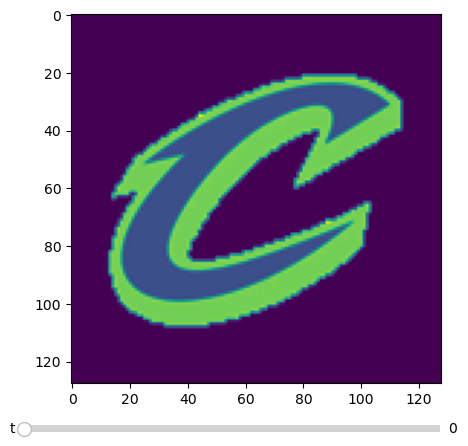

In [36]:
from matplotlib.widgets import Slider

plt.imshow(deform(source, target, 0))
axb = plt.axes([0.15, 0, 0.65, 0.03])
sb = Slider(ax=axb, label="t", valmin=0, valmax=1, valinit=0)

def update(val):
    plt.imshow(deform(source, target, val))
sb.on_changed(update)

plt.show()

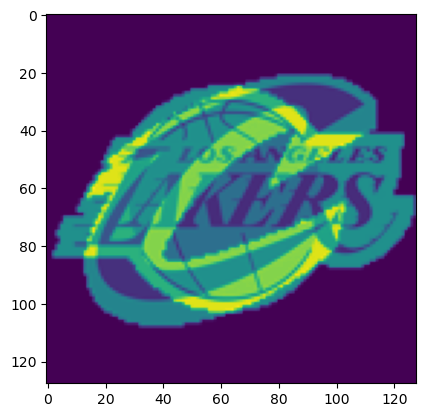

In [26]:
plt.imshow(deform(source, target, t=0.4))
plt.show()

/var/folders/9h/ycvt7dg956977xwtx4pzc2pw0000gn/T/ipykernel_19887/1716499618.py:21: MatplotlibDeprecationWarning: Passing the valinit parameter of __init__() positionally is deprecated since Matplotlib 3.7; the parameter will become keyword-only two minor releases later.
  freq = Slider(axfreq, 'Frequency', 0.0, 20.0, 3)
/var/folders/9h/ycvt7dg956977xwtx4pzc2pw0000gn/T/ipykernel_19887/1716499618.py:25: MatplotlibDeprecationWarning: Passing the valinit parameter of __init__() positionally is deprecated since Matplotlib 3.7; the parameter will become keyword-only two minor releases later.
  amplitude = Slider(axamplitude, 'Amplitude', 0.0,


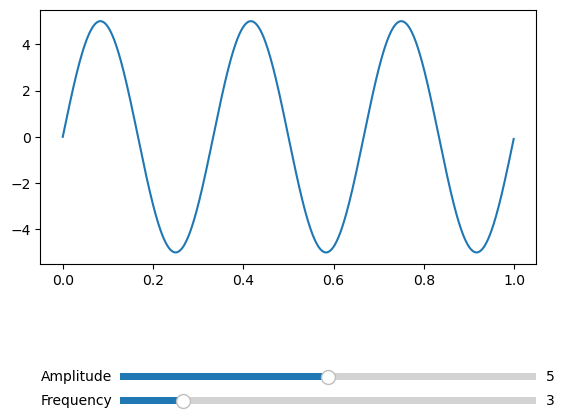

In [30]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

# Create subplot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35)

# Create and plot sine wave
t = np.arange(0.0, 1.0, 0.001)
s = 5 * np.sin(2 * np.pi * 3 * t)
l, = plt.plot(t, s)

# Create axes for frequency and amplitude sliders
axfreq = plt.axes([0.25, 0.05, 0.65, 0.03])
axamplitude = plt.axes([0.25, 0.1, 0.65, 0.03])

# Create a slider from 0.0 to 20.0 in axes axfreq
# with 3 as initial value
freq = Slider(axfreq, 'Frequency', 0.0, 20.0, 3)

# Create a slider from 0.0 to 10.0 in axes axfreq
# with 5 as initial value and valsteps of 1.0
amplitude = Slider(axamplitude, 'Amplitude', 0.0,
				10.0, 5, valstep=1.0)

# Create function to be called when slider value is changed

def update(val):
	f = freq.val
	a = amplitude.val
	l.set_ydata(a*np.sin(2*np.pi*f*t))

# Call update function when slider value is changed
freq.on_changed(update)
amplitude.on_changed(update)

# display graph
plt.show()
